### Notebook for 6c -- Apr 1 2002

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import joblib

from sklearn.tree import export_graphviz
import pydot

In [4]:
nlms = pd.read_csv('data/NLMS_PublicUse_5.1/6c_new.csv', index_col='record');

In [5]:
nlms.columns

Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod', 'hosp',
       'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct', 'stater',
       'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100', 'agesmk',
       'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')

In [6]:
cols = ['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse']

In [7]:
col_dict = {'index': 'record number', 'age': 'age at time of interview', 'race': 'race', 'sex': 'gender', 
            'ms': 'marital status', 'hisp': 'hispanic', 'adjinc': 'inflation adjusted income', 'educ': 'highest grade completed', 
            'pob': 'region of birth', 'wt': 'adjusted weight', 'hhid': 'household ID number', 'hhnum': 'number of people in household',
            'reltrf': 'relationship to reference person', 'occ': '4 digit occupation code', 'majocc': 'major occupation code',
            'ind': '4 digit industry code', 'majind': 'major industry code', 'esr': 'employment status recode', 
            'urban': 'urban / rural status', 'smsast': 'SMSAST (Standard Metropolitan Statistical Area) status', 'inddea': 'death indicator',
            'cause113': 'cause of death', 'follow': 'length of follow-up', 'dayod': 'day of week of death', 
            'hosp': 'hospital type', 'hosppd': 'hospital death indicator', 'ssnyn': 'presence of ssn', 
            'vt': 'veteran status', 'histatus': 'health insurance status', 'hitype': 'health insurance type', 
            'povpct': 'income as percent of poverty level', 'stater': 'state recode', 'rcow': 'recoded class of worker', 
            'tenure': 'housing tenure', 'citizen': 'citizenship', 'health': 'health', 'indalg': 'indicator of algorithmic death', 
            'smok100': 'smoked more than 100 cigarettes', 'agesmk': 'age started smoking',
            'smokstat': 'cigarette smoking status', 'smokhome': 'rules for smoking cigarettes in the home', 
            'curruse': 'currently use smokeless tobacco', 'everuse': 'ever use smokeless tobacco'}

In [12]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745162 entries, 610900 to 483400
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       745162 non-null  int64  
 1   race      745069 non-null  float64
 2   sex       745162 non-null  int64  
 3   ms        560324 non-null  float64
 4   hisp      735206 non-null  float64
 5   adjinc    744276 non-null  float64
 6   educ      560324 non-null  float64
 7   pob       745162 non-null  int64  
 8   wt        745162 non-null  int64  
 9   hhid      745162 non-null  int64  
 10  hhnum     745162 non-null  int64  
 11  reltrf    745162 non-null  int64  
 12  occ       377242 non-null  float64
 13  majocc    377242 non-null  float64
 14  ind       377242 non-null  float64
 15  majind    377242 non-null  float64
 16  esr       557195 non-null  float64
 17  urban     715301 non-null  float64
 18  smsast    603623 non-null  float64
 19  inddea    745162 non-null  int64  
 20 

In [8]:
lens = nlms.apply(lambda x: len(x.unique()))
lens

age             91
race             6
sex              2
ms               6
hisp             4
adjinc          15
educ            12
pob             64
wt            2110
hhid        266422
hhnum           16
reltrf           6
occ            506
majocc          12
ind            265
majind          15
esr              6
urban            3
smsast           4
inddea           2
cause113       100
follow        2193
dayod            8
hosp             7
hospd            5
ssnyn            2
vt               3
histatus         2
hitype           6
povpct          22
stater          51
rcow             6
tenure           3
citizen          6
health           6
indalg           3
smok100          1
agesmk           1
smokstat         1
smokhome         1
curruse          1
everuse          1
dtype: int64

In [9]:
nlms.pob.unique()

array([922,   0, 901, 960, 104, 927, 934, 109, 913, 925, 947, 905, 917,
       935, 106, 926, 920, 930, 906, 928, 904, 951, 936, 937, 954, 912,
       918, 923, 919, 103, 948, 111, 955, 921, 911, 939, 102, 924, 940,
       902, 953, 908, 909, 931, 956, 949, 105, 108, 916, 915, 941, 944,
       938, 942, 932, 946, 950, 107, 945, 101, 110, 910, 933, 929])

In [10]:
pob_dict = {909: 'CT',   0: np.nan, 942: 'PA', 928: 'MS', 917: 'IL', 925: 'MA', 104: 'Western Europe', 111: 'Other NS', 934: 'NJ', 945: 'SC', 936: 'NY', 944: 'RI', 107: 'Central America',
       927: 'MN', 926: 'MI', 948: 'TX', 906: 'CA', 950: 'VT', 937: 'NC', 911: 'DC', 933: 'NH', 939: 'OH', 106: 'South America', 109: 'Island Country', 912: 'FL', 108: 'Mexico',
       913: 'GA', 102: 'Asia', 949: 'UT', 103: 'Eastern Europe', 931: 'NE', 954: 'WV', 951: 'VA', 924: 'MD', 901: 'AL', 918: 'IN', 938: 'ND', 956: 'WY', 923: 'ME',
       947: 'TN', 921: 'KY', 101: 'Africa', 105: 'North Am, Not US or Mexico', 955: 'WI', 941: 'OR', 953: 'WA', 905: 'AR', 902: 'AK', 920: 'KS', 915: 'HI', 904: 'AZ', 930: 'MT',
       922: 'LA', 940: 'OK', 932: 'NV', 908: 'CO', 910: 'DE', 946: 'SD', 935: 'NM', 110: 'Other NS', 919: 'IA', 916: 'ID', 929: 'MO', 960: 'American Samoa'}

In [11]:
print('Pre na qty: ' + str(nlms.isnull().sum() * 100 / len(nlms)))

Pre na qty: age           0.000000
race          0.012481
sex           0.000000
ms           24.805076
hisp          1.336085
adjinc        0.118900
educ         24.805076
pob           0.000000
wt            0.000000
hhid          0.000000
hhnum         0.000000
reltrf        0.000000
occ          49.374498
majocc       49.374498
ind          49.374498
majind       49.374498
esr          25.224985
urban         4.007317
smsast       18.994393
inddea        0.000000
cause113      0.000000
follow        0.000000
dayod        96.721250
hosp         96.984146
hospd        96.984146
ssnyn         0.000000
vt           27.408939
histatus      0.000000
hitype        0.000000
povpct        2.590980
stater        0.000000
rcow         50.928523
tenure        0.000000
citizen       6.963989
health       10.222609
indalg       94.207971
smok100     100.000000
agesmk      100.000000
smokstat    100.000000
smokhome    100.000000
curruse     100.000000
everuse     100.000000
dtype: float64


In [13]:
nlms.follow.value_counts(normalize=True)

2192    0.967212
1492    0.000032
656     0.000031
379     0.000030
710     0.000030
          ...   
1502    0.000004
199     0.000004
1292    0.000004
1800    0.000004
1439    0.000004
Name: follow, Length: 2193, dtype: float64

In [14]:
nlms.drop(columns=['smok100', 'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'], inplace=True)

In [15]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745162 entries, 610900 to 483400
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       745162 non-null  int64  
 1   race      745069 non-null  float64
 2   sex       745162 non-null  int64  
 3   ms        560324 non-null  float64
 4   hisp      735206 non-null  float64
 5   adjinc    744276 non-null  float64
 6   educ      560324 non-null  float64
 7   pob       745162 non-null  int64  
 8   wt        745162 non-null  int64  
 9   hhid      745162 non-null  int64  
 10  hhnum     745162 non-null  int64  
 11  reltrf    745162 non-null  int64  
 12  occ       377242 non-null  float64
 13  majocc    377242 non-null  float64
 14  ind       377242 non-null  float64
 15  majind    377242 non-null  float64
 16  esr       557195 non-null  float64
 17  urban     715301 non-null  float64
 18  smsast    603623 non-null  float64
 19  inddea    745162 non-null  int64  
 20 

In [16]:
nlms.shape

(745162, 36)

### DataFrame for deceased individuals

In [17]:
dec = nlms[nlms.dayod.isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])]


In [18]:
causes_dict_ref = {1: 'Infectious Disease', 2: 'Malignant or Other Neoplasm', 3: 'Nutrition-Related', 4: 'NeuroMuscular', 
                   5: 'Cardiovascular or Circulatory', 6: 'Respiratory', 7: 'Liver or Kidney', 8: 'Pregnancy or Birth', 
                  9: 'Otherwise Unspecified', 10: 'Accidental Harm', 11: 'Intentional Harm'}
causes_dict = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 
               18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 
               34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 
               42: 3, 43: 3, 44: 3, 45: 3, 46: 4, 47: 4, 48: 4, 49: 5, 50: 5, 51: 5, 
               52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5, 65: 5, 
               66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 80: 7, 
               81: 7, 82: 7, 83: 7, 84: 7, 85: 7, 86: 7, 87: 7, 88: 7, 89: 7, 90: 8, 91: 8, 92: 8, 93: 8, 77: 9, 78: 9, 79: 9, 94: 9, 95: 9, 
               96: 10, 97: 10, 98: 10, 99: 10, 100: 10, 101: 10, 102: 10, 103: 10, 104: 10, 113: 10, 105: 11, 
               106: 11, 107: 11, 108: 11, 109: 11, 110: 11, 111: 11, 112: 11}

In [19]:
dec.cause113.replace(causes_dict, inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
dec.cause113.unique()

array([ 2,  5,  4,  9,  6,  7,  3, 10,  1, 11,  0,  8])

In [21]:
dec.shape

(24432, 36)

In [22]:
dec

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,vt,histatus,hitype,povpct,stater,rcow,tenure,citizen,health,indalg
record,,,,,,,,,,,,,,,,,,,,,
610904,69,1.0,2,2.0,3.0,3.0,8.0,0,551,2,...,0.0,1,1,6.0,63,NaN,1,NaN,5.0,1.0
610939,89,1.0,2,2.0,3.0,2.0,4.0,901,625,16,...,0.0,1,1,3.0,63,NaN,1,1.0,5.0,1.0
610942,70,2.0,1,1.0,3.0,10.0,8.0,960,330,18,...,1.0,1,1,1.0,63,NaN,1,1.0,NaN,1.0
610967,74,1.0,1,1.0,3.0,7.0,8.0,901,539,29,...,1.0,1,1,12.0,63,NaN,1,1.0,4.0,1.0
610969,67,1.0,1,2.0,3.0,7.0,11.0,0,446,30,...,1.0,1,1,15.0,63,NaN,3,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,72,1.0,2,1.0,3.0,5.0,11.0,103,344,266232,...,0.0,1,1,6.0,16,NaN,1,NaN,3.0,1.0
536603,76,1.0,2,5.0,3.0,6.0,8.0,960,364,266236,...,0.0,1,1,9.0,16,NaN,1,NaN,5.0,1.0
483212,54,1.0,1,1.0,3.0,14.0,11.0,960,233,266352,...,0.0,1,4,21.0,16,1.0,1,NaN,NaN,1.0


In [23]:
dec.to_csv('data/dec_6c.csv')

In [24]:
# Start over here: 
dec = pd.read_csv('data/dec_6c.csv')

In [25]:
# Split before preprocessing
dec_label = dec.pop('age')
dec_features = dec.copy()

#### Pipeline for Processing

In [26]:
cols_to_drop = ['hhid', 'reltrf', 'occ', 'majocc', 'majind', 'ind', 'smsast', 
                'inddea', 'follow', 'hospd', 'stater', 'health', 'indalg',
               'citizen', 'rcow', 'hhnum']

In [27]:
dec_features.drop(columns=cols_to_drop, inplace=True, axis=1);

In [28]:
dec_features.set_index('record', drop=True, inplace=True)

In [29]:
dec_features

,race,sex,ms,hisp,adjinc,educ,pob,wt,esr,urban,cause113,dayod,hosp,ssnyn,vt,histatus,hitype,povpct,tenure
record,,,,,,,,,,,,,,,,,,,
610904,1.0,2,2.0,3.0,3.0,8.0,0,551,5.0,1.0,2,4.0,2.0,0,0.0,1,1,6.0,1
610939,1.0,2,2.0,3.0,2.0,4.0,901,625,4.0,1.0,5,6.0,1.0,1,0.0,1,1,3.0,1
610942,2.0,1,1.0,3.0,10.0,8.0,960,330,5.0,1.0,2,5.0,1.0,0,1.0,1,1,1.0,1
610967,1.0,1,1.0,3.0,7.0,8.0,901,539,5.0,1.0,5,7.0,4.0,1,1.0,1,1,12.0,1
610969,1.0,1,2.0,3.0,7.0,11.0,0,446,5.0,1.0,5,3.0,4.0,0,1.0,1,1,15.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,1.0,2,1.0,3.0,5.0,11.0,103,344,5.0,1.0,10,3.0,1.0,0,0.0,1,1,6.0,1
536603,1.0,2,5.0,3.0,6.0,8.0,960,364,5.0,1.0,3,1.0,1.0,0,0.0,1,1,9.0,1
483212,1.0,1,1.0,3.0,14.0,11.0,960,233,1.0,1.0,11,4.0,4.0,1,0.0,1,4,21.0,1


In [30]:
cat_cols = ['race', 'sex', 'ms', 'hisp', 'pob', 'esr', 'urban', 
               'cause113', 'dayod', 'hosp', 'ssnyn', 'vt', 'histatus', 'hitype', 'tenure']

num_cols = ['adjinc', 'educ', 'wt', 'povpct']

#### Fill missing values with KNN Imputer

In [31]:
imputer_cat = KNNImputer(n_neighbors=1)

In [32]:
cat_df_imp = pd.DataFrame(imputer_cat.fit_transform(dec_features[cat_cols]), 
                          columns=cat_cols, index=dec_features.index)

In [33]:
imputer_num = KNNImputer(n_neighbors=3)

In [34]:
num_df_imp = pd.DataFrame(imputer_num.fit_transform
                          (dec_features[num_cols]), 
                          columns=num_cols, 
                          index=dec_features.index)

Check that num and cat imputed dfs have same indices

In [35]:
num_df_imp.shape, cat_df_imp.shape

((24432, 4), (24432, 15))

In [36]:
num_indices = num_df_imp.index.to_list()

In [37]:
cat_indices = cat_df_imp.index.to_list()

In [38]:
len(list(set(num_indices) - set(cat_indices)))

0

In [39]:
num_df_imp

,adjinc,educ,wt,povpct
record,,,,
610904,3.0,8.0,551.0,6.0
610939,2.0,4.0,625.0,3.0
610942,10.0,8.0,330.0,1.0
610967,7.0,8.0,539.0,12.0
610969,7.0,11.0,446.0,15.0
...,...,...,...,...
536595,5.0,11.0,344.0,6.0
536603,6.0,8.0,364.0,9.0
483212,14.0,11.0,233.0,21.0


#### Standardize Numerical Data (num_df_imp)

In [40]:
scaler = MinMaxScaler()
X_train_num_ies = scaler.fit_transform(num_df_imp[num_cols])
X_train_num_ies

array([[0.15384615, 0.53846154, 0.20918564, 0.25      ],
       [0.07692308, 0.23076923, 0.23774604, 0.1       ],
       [0.69230769, 0.53846154, 0.12389039, 0.        ],
       ...,
       [1.        , 0.76923077, 0.08645311, 1.        ],
       [0.07692308, 0.76923077, 0.74720185, 0.15      ],
       [0.07692308, 0.76923077, 0.82362022, 0.1       ]])

In [41]:
num_df_imp = pd.DataFrame(X_train_num_ies, 
                          columns=num_cols, 
                          index=num_df_imp.index)

In [42]:
num_df_imp #Scaled

,adjinc,educ,wt,povpct
record,,,,
610904,0.153846,0.538462,0.209186,0.25
610939,0.076923,0.230769,0.237746,0.10
610942,0.692308,0.538462,0.123890,0.00
610967,0.461538,0.538462,0.204554,0.55
610969,0.461538,0.769231,0.168661,0.70
...,...,...,...,...
536595,0.307692,0.769231,0.129294,0.25
536603,0.384615,0.538462,0.137013,0.40
483212,1.000000,0.769231,0.086453,1.00


In [43]:
cat_df_imp

,race,sex,ms,hisp,pob,esr,urban,cause113,dayod,hosp,ssnyn,vt,histatus,hitype,tenure
record,,,,,,,,,,,,,,,
610904,1.0,2.0,2.0,3.0,0.0,5.0,1.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,1.0
610939,1.0,2.0,2.0,3.0,901.0,4.0,1.0,5.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0
610942,2.0,1.0,1.0,3.0,960.0,5.0,1.0,2.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0
610967,1.0,1.0,1.0,3.0,901.0,5.0,1.0,5.0,7.0,4.0,1.0,1.0,1.0,1.0,1.0
610969,1.0,1.0,2.0,3.0,0.0,5.0,1.0,5.0,3.0,4.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,1.0,2.0,1.0,3.0,103.0,5.0,1.0,10.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0
536603,1.0,2.0,5.0,3.0,960.0,5.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
483212,1.0,1.0,1.0,3.0,960.0,1.0,1.0,11.0,4.0,4.0,1.0,0.0,1.0,4.0,1.0


### One-Hot Encoding for Categorical Variables

In [44]:
cat_df_imp.shape, type(cat_df_imp)

((24432, 15), pandas.core.frame.DataFrame)

In [45]:
encoder=OneHotEncoder(sparse=False, drop='first')

train_X_encoded = pd.DataFrame(encoder.fit_transform(cat_df_imp[cat_cols]), index=cat_df_imp.index, columns=encoder.get_feature_names(input_features=cat_cols))

In [46]:
len(train_X_encoded.columns)

111

Merge Num & Cat Columns back to X_Train

In [47]:
df = num_df_imp.merge(train_X_encoded, how='inner', left_index=True, right_index=True)


In [48]:
df

,adjinc,educ,wt,povpct,race_2.0,race_3.0,race_4.0,race_5.0,sex_2.0,ms_2.0,...,ssnyn_1.0,vt_1.0,histatus_1.0,hitype_1.0,hitype_2.0,hitype_3.0,hitype_4.0,hitype_5.0,tenure_2.0,tenure_3.0
record,,,,,,,,,,,,,,,,,,,,,
610904,0.153846,0.538462,0.209186,0.25,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
610939,0.076923,0.230769,0.237746,0.10,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
610942,0.692308,0.538462,0.123890,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
610967,0.461538,0.538462,0.204554,0.55,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
610969,0.461538,0.769231,0.168661,0.70,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,0.307692,0.769231,0.129294,0.25,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
536603,0.384615,0.538462,0.137013,0.40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
483212,1.000000,0.769231,0.086453,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
X = df.copy()

In [50]:
X.to_csv('data/X_6c.csv')

In [51]:
X.shape

(24432, 115)

#### Creating the Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', imputer_num))
      ,('encoder', OrdinalEncoder())
])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, dec_label, test_size=0.2, random_state=42)

In [740]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [741]:
def scree_plot(X, count_pc=None):
    """return the scree plot of the pca of data X
    Args
    ----
    X: np.array() of shape (m,n)
    count_pc (int): the count of pc's to show in the plot
    """
    pca = PCA()
    pca.fit(X)
    l = len(pca.explained_variance_)
    if count_pc is not None:
        num = min(count, l)
    else: 
        num = l
    plt.plot(np.arange(1,num+1), pca.explained_variance_[:num])
    plt.xlabel('ith Principle Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')

''

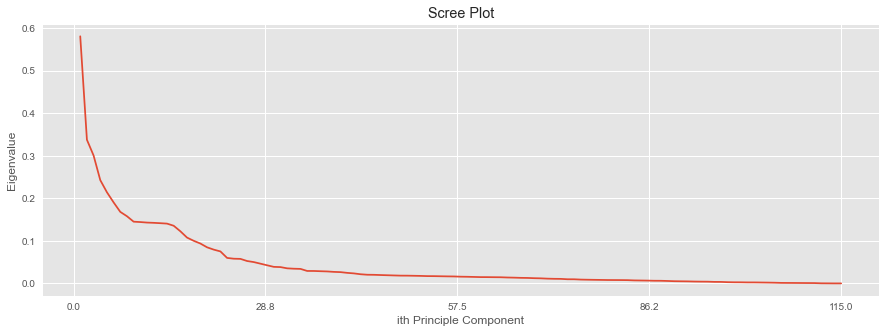

In [744]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = scree_plot(X_pca)
plt.xticks(ticks=np.linspace(0, len(X_train.columns), 5))
;

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19545, 115), (4887, 115), (19545,), (4887,))

#### Linear Regression 

In [54]:
model_lr = LinearRegression()

In [55]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [56]:
predict_train = model_lr.predict(X_train)

In [57]:
predict_train

array([76.54885191, 70.69412994, 74.50101847, ..., 64.03648985,
       47.51122761, 74.33529059])

In [58]:
predict_test = model_lr.predict(X_test)

In [59]:
print('RMSE on train data with LR: ', mean_squared_error(y_train, predict_train))
print('RMSE on test data with LR: ', mean_squared_error(y_test, predict_test))

RMSE on train data with LR:  116.35116911557093
RMSE on test data with LR:  128.2290064576021


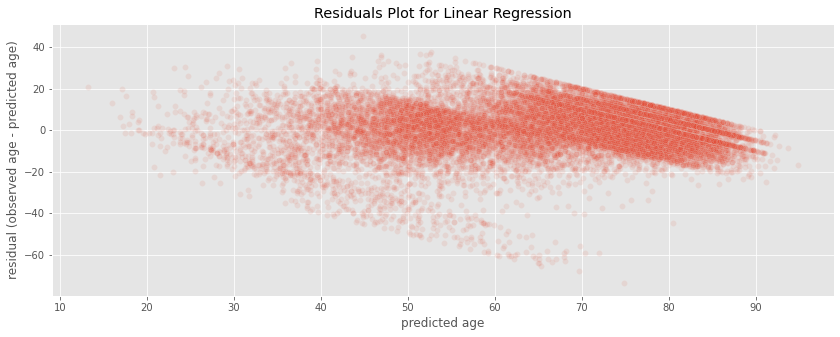

In [60]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(x=predict_train, y=y_train - predict_train, ax=ax, palette='Blues', alpha=0.1)
ax.set_xlabel('predicted age')
ax.set_ylabel('residual (observed age - predicted age)')
ax.set_title('Residuals Plot for Linear Regression');

#### Lasso Regressor

In [61]:
model_lasso = Lasso(random_state=42)

In [62]:
model_lasso.fit(X_train, y_train)

Lasso(random_state=42)

In [63]:
predict_train_lasso = model_lasso.predict(X_train)

In [64]:
predict_test_lasso = model_lasso.predict(X_test)

In [65]:
print('RMSE on Train Data with Lasso: ', mean_squared_error(y_train, predict_train_lasso))
print('R_squared on Train Data with Lasso: ', r2_score(y_train, predict_train_lasso))

print('RMSE on Test Data with Lasso: ', mean_squared_error(y_test, predict_test_lasso))
print('R_squared on Train Data with Lasso: ', r2_score(y_test, predict_test_lasso))

RMSE on Train Data with Lasso:  165.70493872743359
R_squared on Train Data with Lasso:  0.4788506711578031
RMSE on Test Data with Lasso:  181.66317907886886
R_squared on Train Data with Lasso:  0.4720488990603797


#### Ridge Regressor

In [66]:
model_ridge = Ridge(random_state=42)

In [67]:
model_ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [68]:
predict_train_ridge = model_ridge.predict(X_train)

In [69]:
predict_test_ridge = model_ridge.predict(X_test)

In [70]:
print('RMSE on Train Data with ridge: ', mean_squared_error(y_train, predict_train_ridge))
print('R_squared on Train Data with ridge: ', r2_score(y_train, predict_train_ridge))

print('RMSE on Test Data with ridge: ', mean_squared_error(y_test, predict_test_ridge))
print('R_squared on Train Data with ridge: ', r2_score(y_test, predict_test_ridge))

RMSE on Train Data with ridge:  116.35919947065459
R_squared on Train Data with ridge:  0.6340451939788352
RMSE on Test Data with ridge:  128.2068559864933
R_squared on Train Data with ridge:  0.6274041271913982


#### Elastic Net Regressor

In [71]:
model_en = ElasticNetCV(random_state=42)

In [72]:
model_en.fit(X_train, y_train)

ElasticNetCV(random_state=42)

In [73]:
predict_train_en = model_en.predict(X_train)

In [74]:
predict_test_en = model_en.predict(X_test)

In [75]:
print('RMSE on Train Data with ElasticNet: ', mean_squared_error(y_train, predict_train_en))
print('R_squared on Train Data with ElasticNet: ', r2_score(y_train, predict_train_en))

print('RMSE on Test Data with ElasticNet: ', mean_squared_error(y_test, predict_test_en))
print('R_squared on Train Data with ElasticNet: ', r2_score(y_test, predict_test_en))

RMSE on Train Data with ElasticNet:  119.78699314733073
R_squared on Train Data with ElasticNet:  0.6232646319284324
RMSE on Test Data with ElasticNet:  132.09019302533656
R_squared on Train Data with ElasticNet:  0.6161183395300096


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual v. Predicted Plot for ElasticNet Regressor Model')

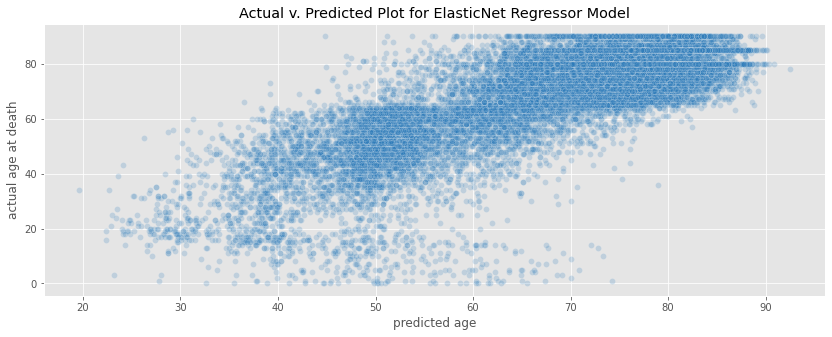

In [77]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_train_en, y_train, ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age')
ax.set_ylabel('actual age at death')
ax.set_title('Actual v. Predicted Plot for ElasticNet Regressor Model')

#### Random Forest Regressor

In [78]:
model_rf = RandomForestRegressor()

In [79]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
predict_train_rf = model_rf.predict(X_train)

In [81]:
predict_test_rf = model_rf.predict(X_test)

In [82]:
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_rf))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train_rf))

print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_rf))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test_rf))

RMSE on Train Data with RF:  14.297999575338963
R_squared on Train Data with RF:  0.9550321617466656
RMSE on Test Data with RF:  113.13066746470227
R_squared on Train Data with RF:  0.6712186765591445


In [83]:
pal = sns.color_palette("Blues")
print(pal.as_hex())

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residuals Plot for Random Forest Regressor Model')

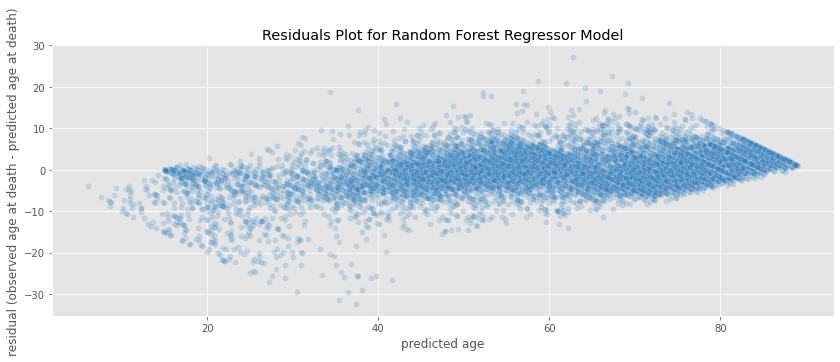

In [85]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_train_rf, y_train - predict_train_rf, ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age')
ax.set_ylabel('residual (observed age at death - predicted age at death)')
ax.set_title('Residuals Plot for Random Forest Regressor Model')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted v. Actual Plot for Random Forest Regressor Model, Training Set')

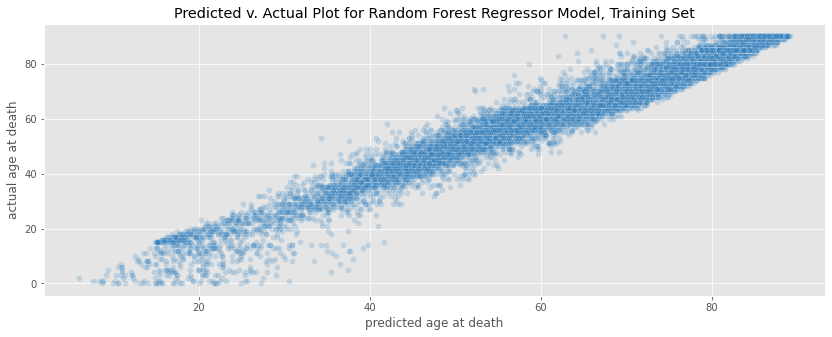

In [87]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_train_rf, y_train, ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age at death')
ax.set_ylabel('actual age at death')
ax.set_title('Predicted v. Actual Plot for Random Forest Regressor Model, Training Set')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted v. Actual Plot for Random Forest Regressor Model, Test Set')

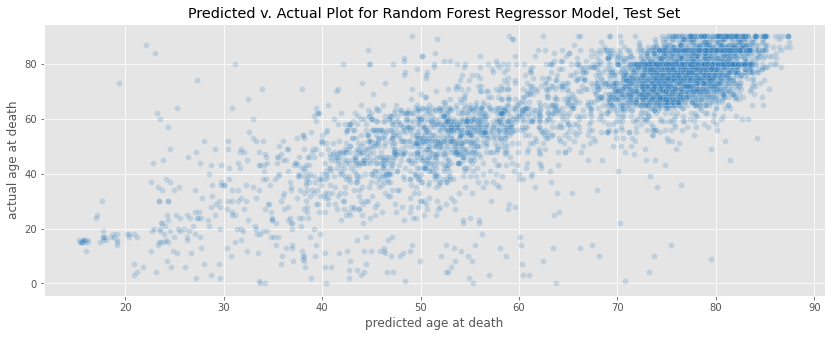

In [89]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_test_rf, y_test, ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age at death')
ax.set_ylabel('actual age at death')
ax.set_title('Predicted v. Actual Plot for Random Forest Regressor Model, Test Set')

In [90]:
mae_train = mean_absolute_error(y_train, predict_train_rf)
mae_test = mean_absolute_error(y_test, predict_test_rf)
print('MAE on Training Set: ', mae_train)
print('MAE on Test Set: ', mae_test)

MAE on Training Set:  2.643808135072909
MAE on Test Set:  7.370544301207285


In [91]:
from yellowbrick.regressor import ResidualsPlot

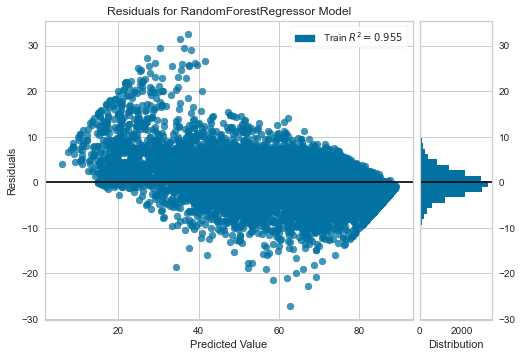

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
visualizer = ResidualsPlot(model_rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(alpha=0.1)  

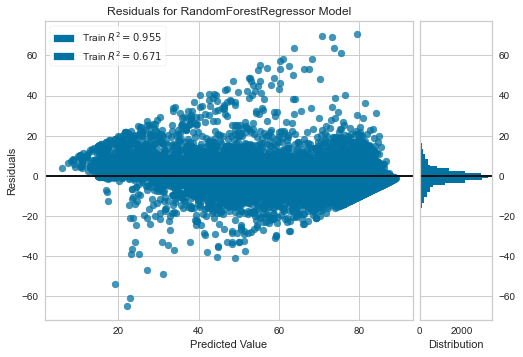

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [93]:
visualizer.fit(X_test, y_test)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(alpha=0.1) 

In [94]:
feature_importances = pd.DataFrame(model_rf.fit(X_train, y_train).feature_importances_,
                                   index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [95]:
feature_importances.head(20)

,importance
hitype_1.0,0.280245
esr_5.0,0.177854
ms_5.0,0.068078
wt,0.060944
educ,0.049584
povpct,0.044340
adjinc,0.037273
ms_2.0,0.037254
cause113_10.0,0.015993
pob_960.0,0.011501
